# **CNN using the Fashion MNIST Dataset**

In [ ]:
# To store and process in a dataframe
import pandas as pd
# Advancec ploting
import seaborn as sns
# For ploting graphs
import matplotlib.pyplot as plt
import tensorflow as tf
# For numerical analysis
import numpy as np
from numpy import argmax, array_equal
# Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten, MaxPooling2D
# Train test split
from sklearn.model_selection import train_test_split
# Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Model performance metrics
from sklearn.metrics import classification_report
# Utility functions
from tensorflow.keras.utils import to_categorical
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

#### **Step 1: Load the Dataset**
##### The Fashion MNIST dataset is being loaded into this phase from Kaggle. First, it purges the system of all directories and files related to Kaggle setup. The Kaggle library is then installed using pip. The Kaggle API credentials file (kaggle.json), which permits access to the Kaggle dataset, is then uploaded. The credentials file is altered in permission and saved in the user's home folder's.kaggle directory. The kaggle datasets download command is used to download the Fashion MNIST dataset from Kaggle. The code then loads the train and test datasets using the pandas read_csv function after unzipping the downloaded files.

In [ ]:
# Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

In [ ]:
# Install Kaggle
!pip install -q kaggle

In [ ]:
# To upload kaggle.json file
from google.colab import files
files.upload()

Saving fashionmnist.zip to fashionmnist (1).zip


In [ ]:
# To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip


In [ ]:
# Load Data
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

###### **Data Visulization After Step 1**

In [ ]:
# Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Test Head
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Print the number of rows and columns in the train and test datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [ ]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Get Classes Distribution Method Implementation
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Calculate the distribution of the classes in the training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


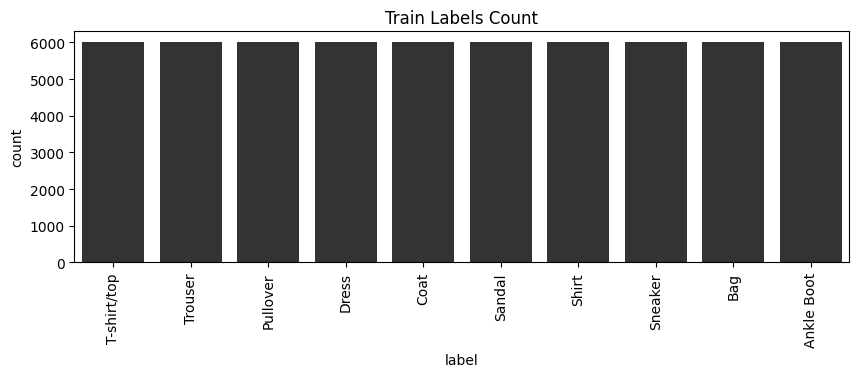

In [ ]:
# Plot Label Per Class Method Implementation for Training Dataset
def plot_label_per_class(train):
    # Convert train to pandas dataframe
    train_df = pd.DataFrame(train)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize the class distribution in the training dataset
plot_label_per_class(train)

In [ ]:
# Calculate the distribution of the classes in the testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


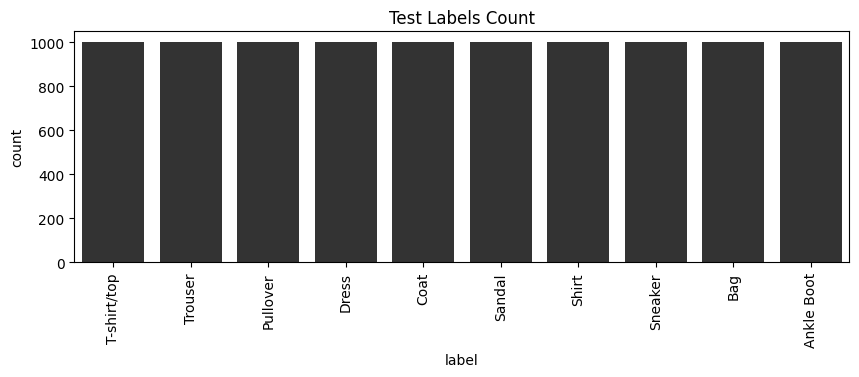

In [ ]:
# Plot Label Per Class Method Implementation for Testing Dataset
def plot_label_per_class(test):
    # Convert test to pandas dataframe
    test_df = pd.DataFrame(test)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize the class distribution in the testing dataset
plot_label_per_class(test)

#### **Step 2: Preprocess the Data**
##### The Fashion MNIST dataset is being prepared for neural network training in this step of data preprocessing. In the first stage, pandas is used to extract the image data and labels from the train and test datasets. After that, the images, which were initially flattened into a 1D array of 784 pixels, are reformed into a 28x28 pixel format.
The next step is to divide each pixel value by 255 to normalize them to fall within the range of 0 to 1. This downscales the pixel values to a range appropriate for neural network training. The rescaled pixel values aid in strengthening the model's foundation and guard against overfitting.

An 80-20 split is then used to divide the data into training and testing sets. The model will be trained using the training set, and its performance will be assessed using the test set.


In [ ]:
# Rescaling image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [ ]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
# Fix data type and Normalizing images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

###### **Data Visulization After Step 2 (Before Data Spliting)**

In [ ]:
# View Training Images Data
train_images

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
# View Training Labels Data
train_labels

array([2, 9, 6, ..., 8, 8, 7])

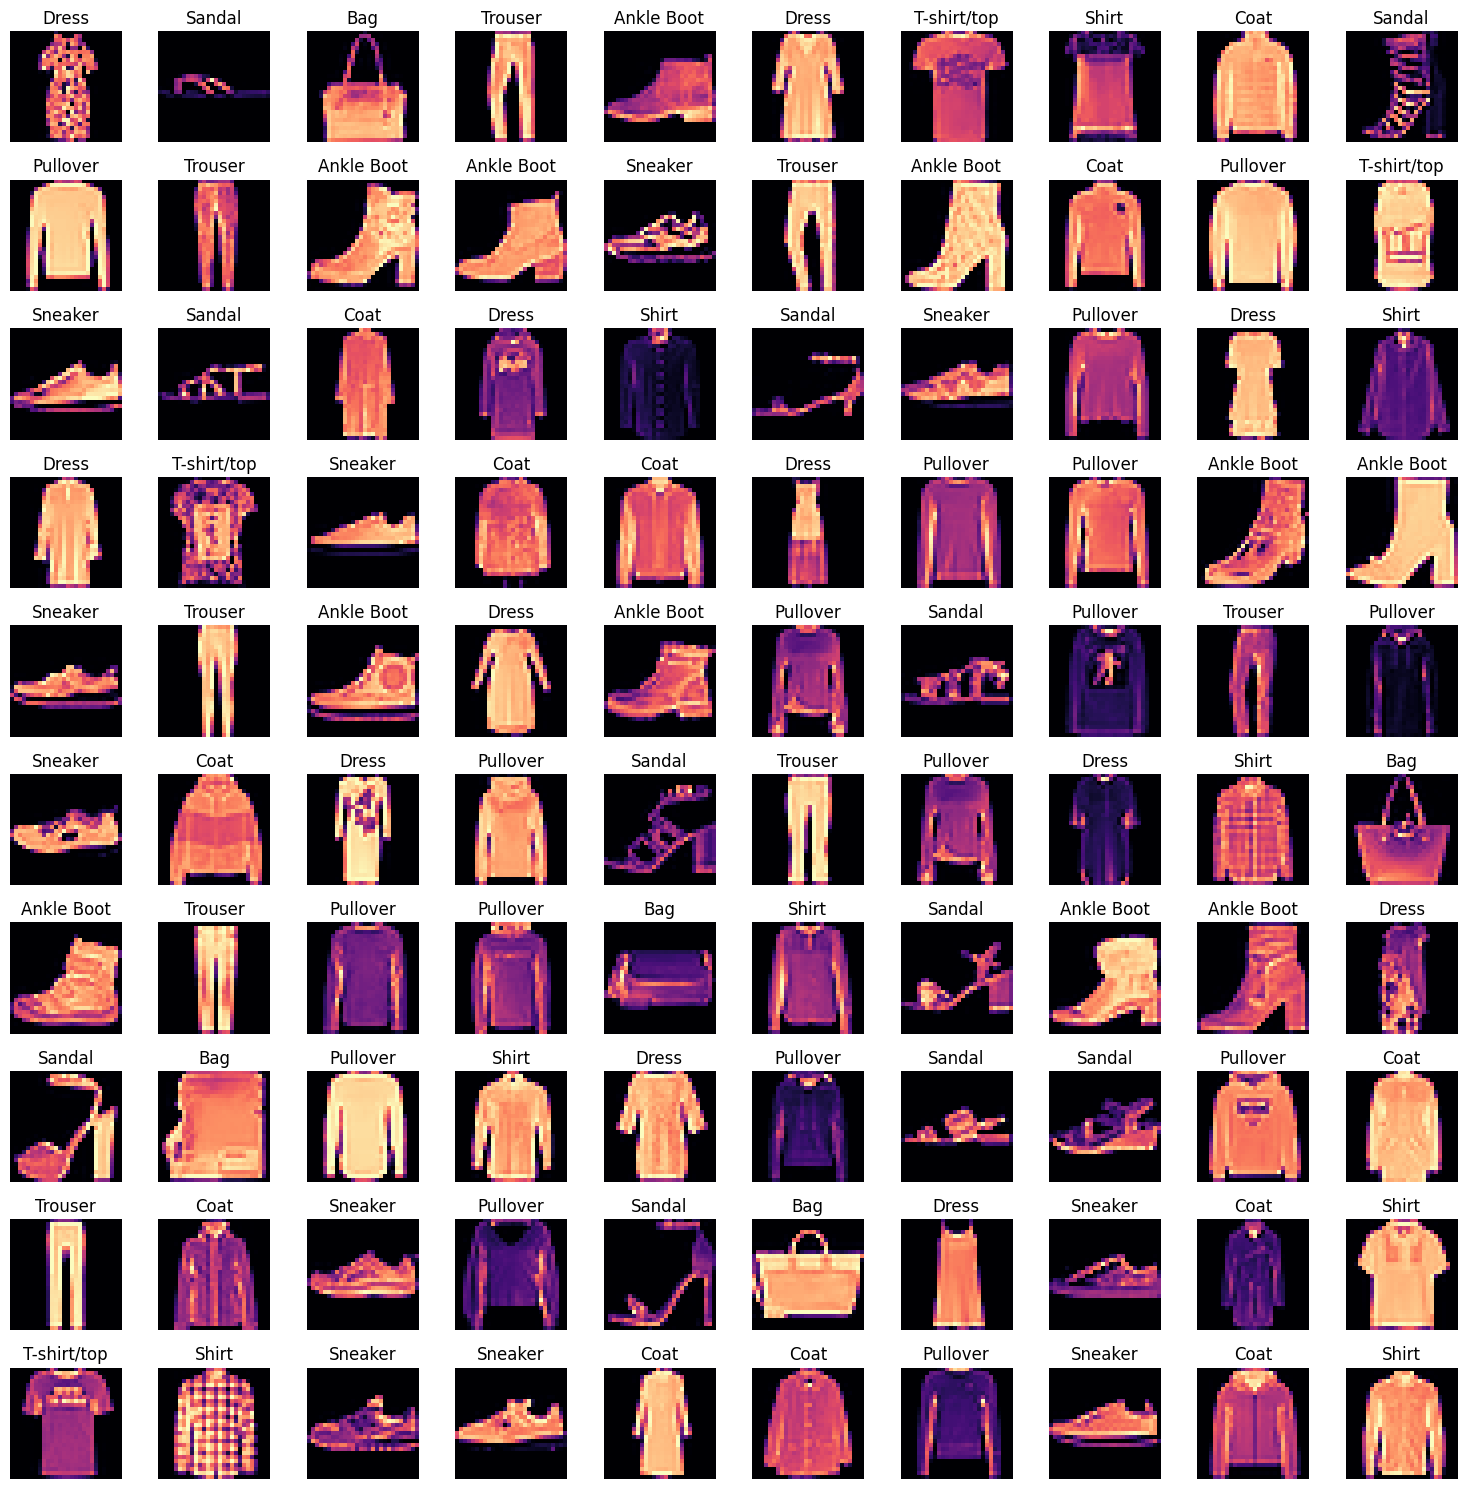

In [ ]:
# Data Visualization
# Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

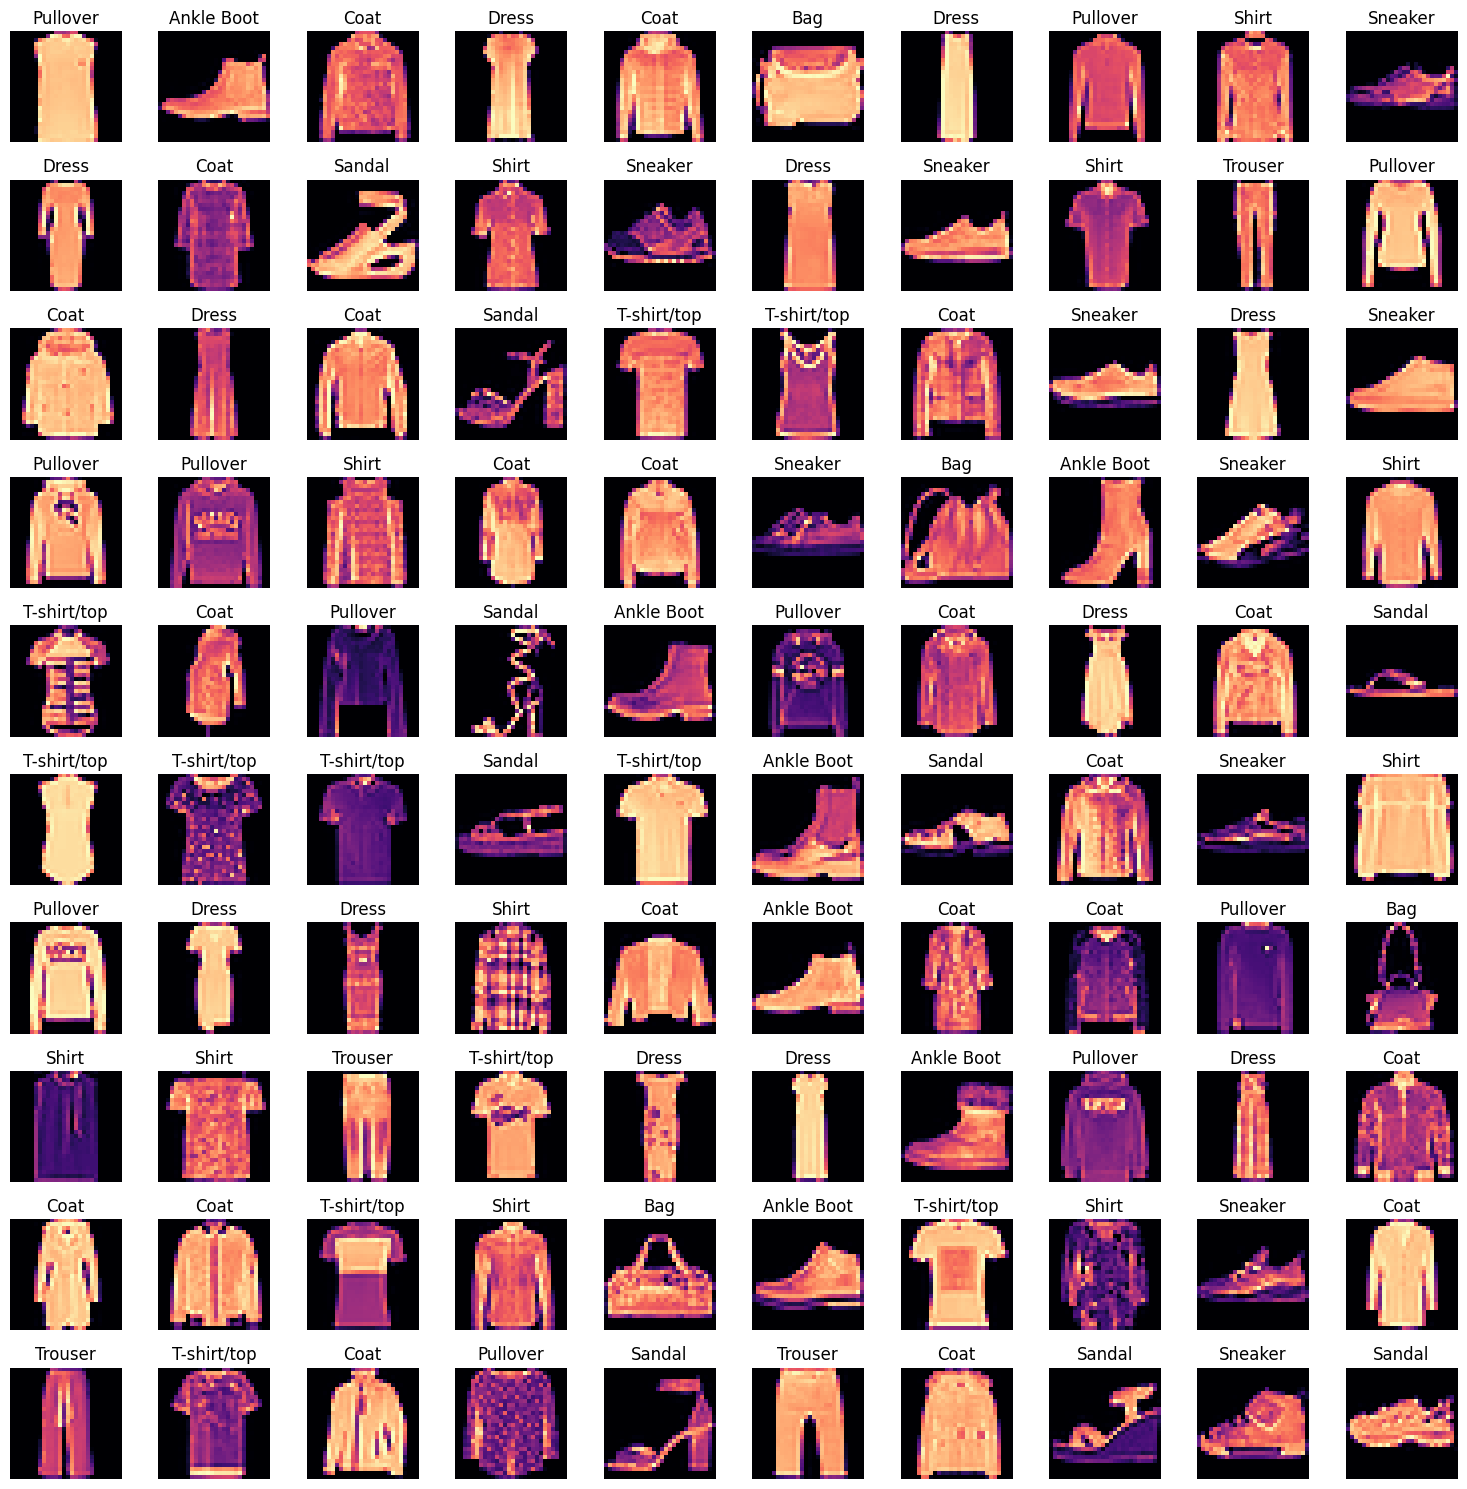

In [ ]:
# First few test images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#### **Step 3: Build the CNN Model**
##### To classify the Fashion MNIST dataset, construct a convolutional neural network (CNN) architecture. Keras Sequential API is used to build the model. The model's input shape is (28, 28, 1), which is the shape of the Fashion MNIST photos. Three convolutional layers are followed by two dense layers in the model architecture. The first convolutional layer contains 32 3x3 filters with the activation function set to'relu'. It accepts the input shape (28, 28 1). The feature maps are then reduced in dimensionality using a max-pooling layer with a pool size of 2x2. With 64 filters and a 3x3 kernel size, the second and third convolutional layers follow the same pattern. The feature maps are then flattened into a 1D array using the Flatten layer. The flattened data is then routed via two dense layers, each with 64 and 10 neurons. Except for the final layer, where the activation function is set to'softmax', the dense layers' activation function is set to'relu'. Finally, to prevent overfitting, a dropout layer with a dropout rate of 0.5 is introduced.

In [ ]:
# Model Parameters
INPUT_SHAPE = (28, 28, 1)
BATCH_SIZE = 128
EPOCHS = 25
VERBOSE = 2

In [ ]:
# Build the model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Flatten(),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')
])

#### **Step 4: Train and Evaluate the Model**
##### The model parameters such as batch size, epochs, and verbosity are defined first in this step. The optimizer, loss function, and evaluation metric are then applied to the model. The model summary is printed to provide a high-level overview of the model design.
When the observed validation loss does not improve after a specific number of epochs (patience), the EarlyStopping callback is utilized to stop the model training.
The model is then trained on the training dataset using the fit() function with the batch size, number of epochs, and verbosity supplied. The fit function additionally receives the EarlyStopping callback as a parameter.

##### Finally, the model is tested on the testing dataset using the evaluate() function, which outputs the model's loss and accuracy. The test loss and accuracy are printed to show how well the model performs on unknown data.


In [ ]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# Halt the training to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Model Fitting
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/25
375/375 - 39s - loss: 0.8351 - accuracy: 0.6955 - val_loss: 0.4965 - val_accuracy: 0.8073 - 39s/epoch - 103ms/step
Epoch 2/25
375/375 - 33s - loss: 0.5323 - accuracy: 0.8064 - val_loss: 0.4171 - val_accuracy: 0.8409 - 33s/epoch - 88ms/step
Epoch 3/25
375/375 - 33s - loss: 0.4571 - accuracy: 0.8356 - val_loss: 0.3643 - val_accuracy: 0.8655 - 33s/epoch - 89ms/step
Epoch 4/25
375/375 - 34s - loss: 0.4083 - accuracy: 0.8562 - val_loss: 0.3213 - val_accuracy: 0.8832 - 34s/epoch - 90ms/step
Epoch 5/25
375/375 - 33s - loss: 0.3737 - accuracy: 0.8674 - val_loss: 0.3146 - val_accuracy: 0.8838 - 33s/epoch - 87ms/step
Epoch 6/25
375/375 - 34s - loss: 0.3482 - accuracy: 0.8803 - val_loss: 0.2925 - val_accuracy: 0.8910 - 34s/epoch - 90ms/step
Epoch 7/25
375/375 - 37s - loss: 0.3308 - accuracy: 0.8852 - val_loss: 0.2864 - val_accuracy: 0.8958 - 37s/epoch - 98ms/step
Epoch 8/25
375/375 - 35s - loss: 0.3068 - accuracy: 0.8940 - val_loss: 0.2748 - val_accuracy: 0.9006 - 35s/epoch - 93ms/step

In [ ]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss: {:.2f}%'.format(test_loss*100))
print('Test Accuracy: {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.2488 - accuracy: 0.9199
Test Loss: 24.88%
Test Accuracy: 91.99%


###### **Data Visulization After Step 3 and 4**

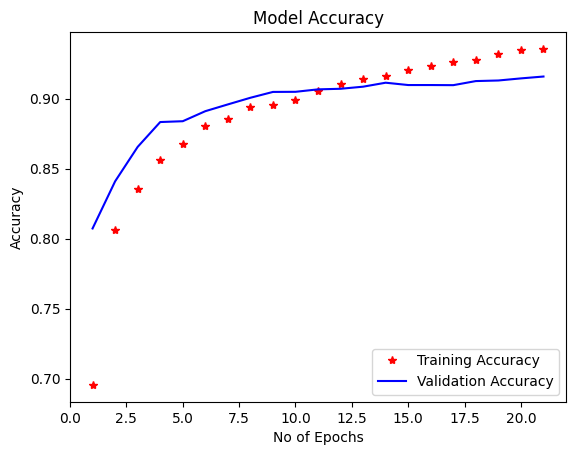

In [ ]:
# Data Visualization
# Accuracy plot graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('./cnn_accuracy_plot.png')
plt.show()

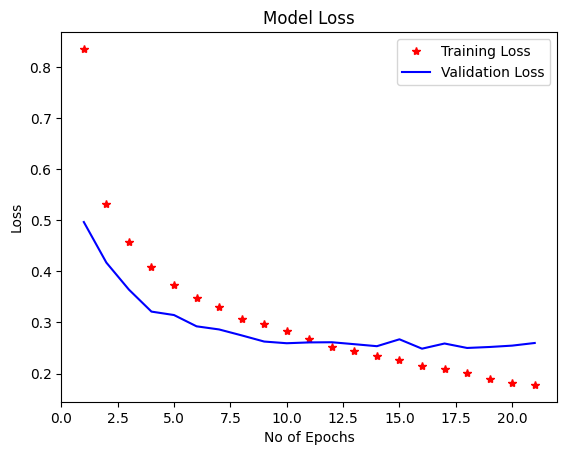

In [ ]:
# Data Visualization
# Loss plot graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('./cnn_loss_plot.png')
plt.show()

In [ ]:
# Predicted values
y_pred = model.predict(X_test)

# Decode predicted labels
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

375/375 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.87      1232
     Trouser       0.99      0.97      0.98      1174
    Pullover       0.85      0.89      0.87      1200
       Dress       0.89      0.94      0.91      1242
        Coat       0.88      0.86      0.87      1185
      Sandal       0.99      0.98      0.98      1141
       Shirt       0.78      0.73      0.76      1243
     Sneaker       0.97      0.97      0.97      1224
         Bag       0.98      0.98      0.98      1149
  Ankle boot       0.97      0.98      0.97      1210

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



<ipython-input-49-da8f7670ab98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


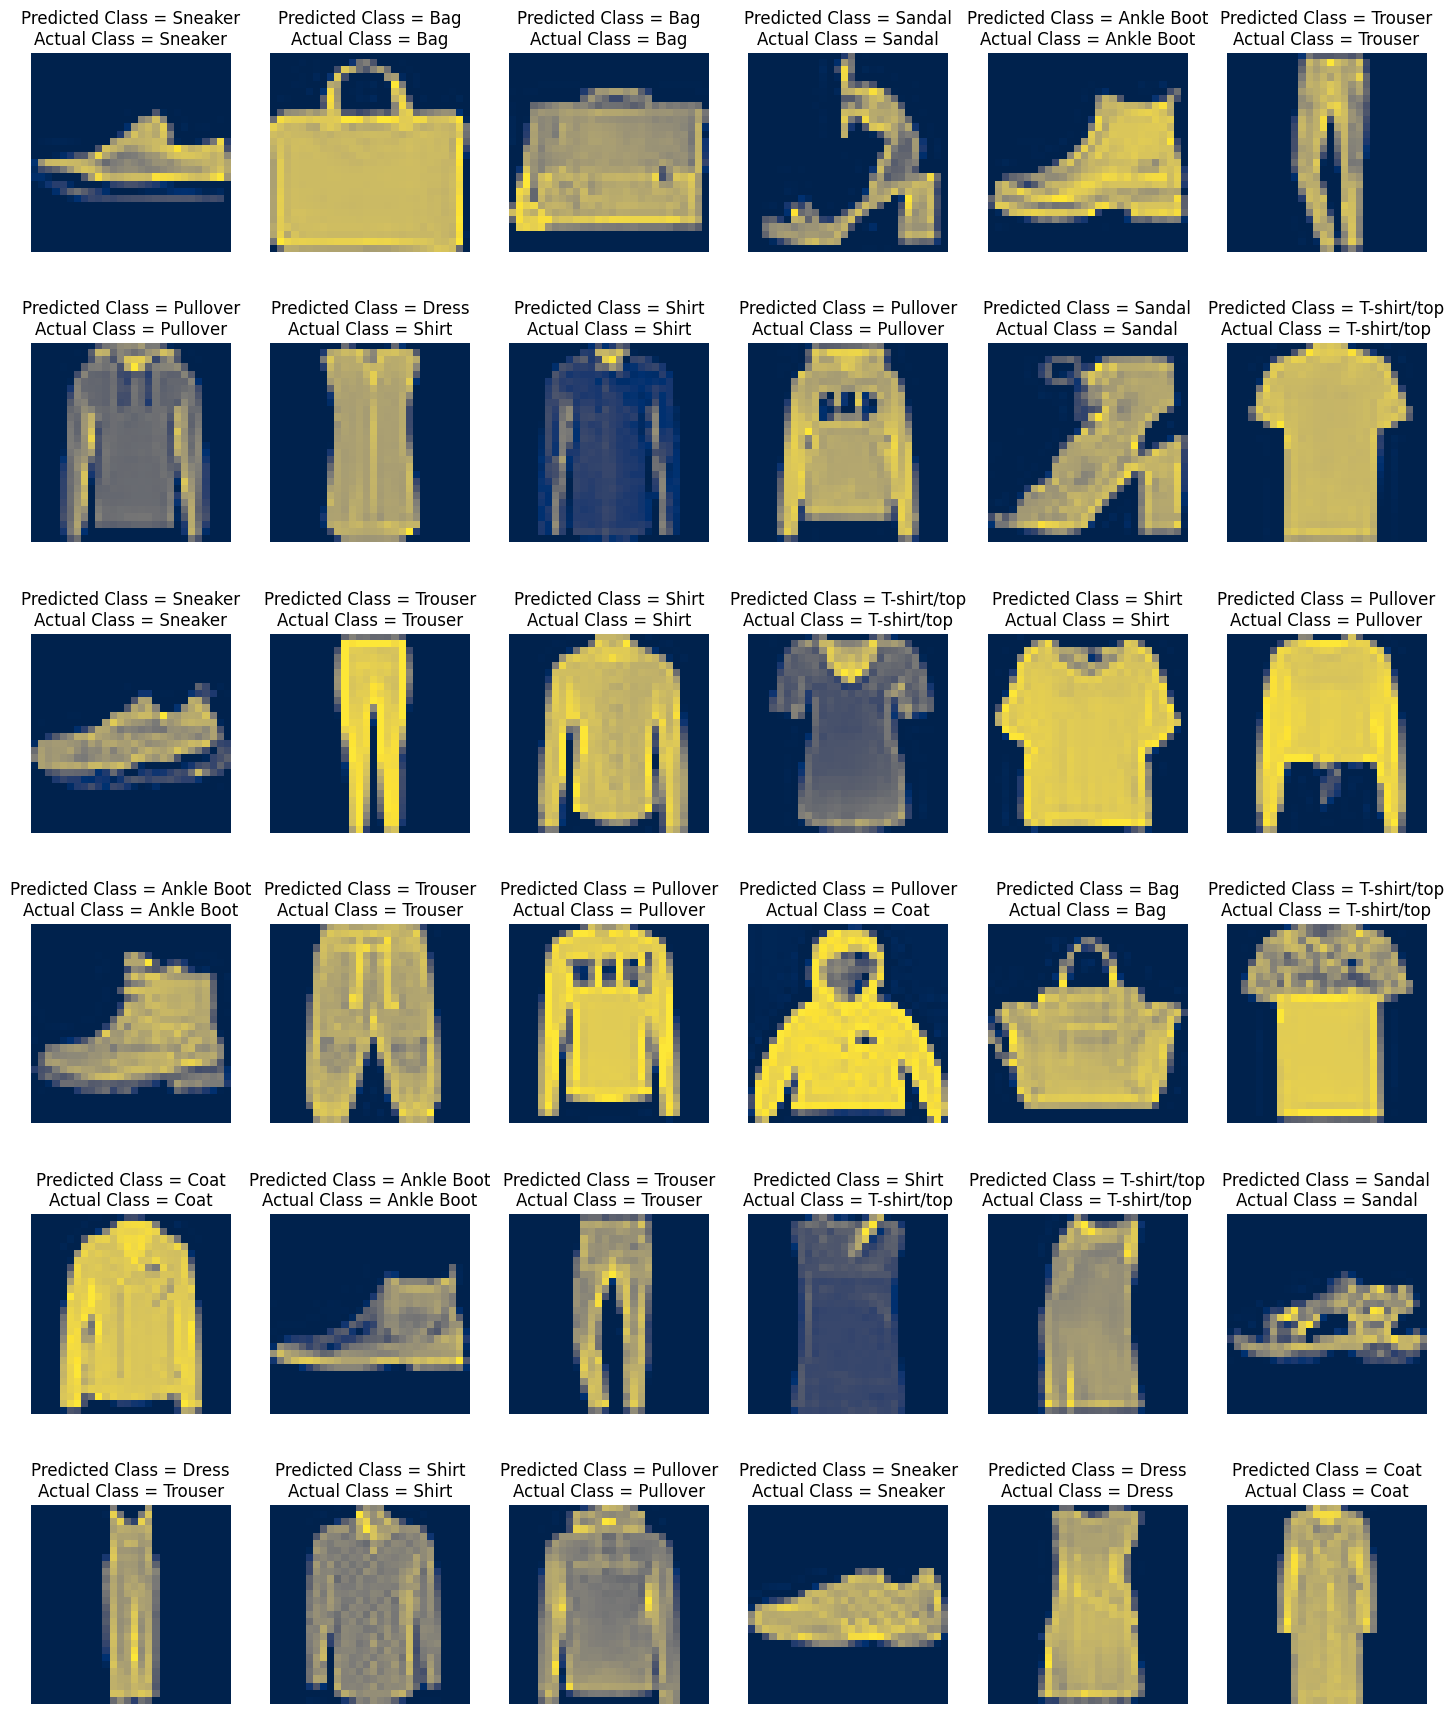

In [ ]:
# Predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(X_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[y_pred[ind]] + '\n' + 'Actual Class = ' + labels[y_test[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./cnn_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')